<a href="https://colab.research.google.com/github/rifkifakhrudin2004/PCVKSemester5/blob/main/modul07/Modul07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Nama  : Rifki Fakhrudin
# # Kelas : 3C
# # Absen : 23

# Modul 07 - Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

# Praktikum

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import os

Praktikum Konvolusi tanpa Library
Buatlah fungsi konvolusi menggunakan algoritma tanpa menggunakan library atau metode konvolusi dari OpenCV.

Catatan parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

Fungsi konvolusi yang dibuat memiliki parameter berupa:

Citra masukan,
Kernel berupa matriks untuk memfilter citra,
Nilai stride/besarnya pergeseran untuk setiap konvolusi,
Nilai pad yang akan ditambahkan pada citra

In [4]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

# Load citra yang akan diproses dan ubah menjadi citra keabuan

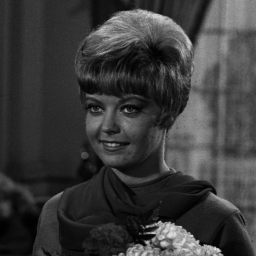

In [7]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

# Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:


In [11]:
# Kernel untuk sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

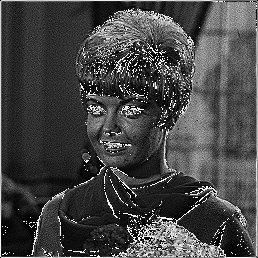

In [10]:
# Memanggil fungsi konvolusi dengan kernel sharpening, stride = 1, dan padding = 2
sharpened_img = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Tampilkan hasil gambar setelah konvolusi dengan kernel sharpening
cv2_imshow(sharpened_img.astype(np.uint8))

# Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut

# Average Filter

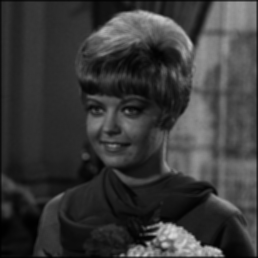

In [12]:
kernel_avg = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

cv2_imshow(convolution2d(img_gray, kernel_avg, 1, 2))

# Low Pass Filter

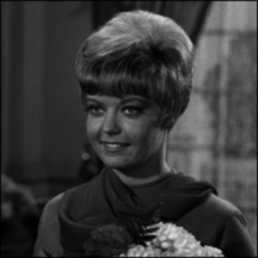

In [13]:
kernel_low = np.array([[1,1,1],[1,4,1],[1,1,1]])/12

cv2_imshow(convolution2d(img_gray, kernel_low, 1, 2))

# High Pass Filter

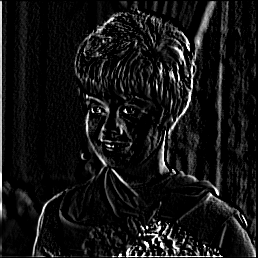

In [14]:
kernel_high = np.array([[-1,0,1],[-1,0,3],[-3,0,1]])

cv2_imshow(convolution2d(img_gray, kernel_high, 1, 2))

# Sharpen

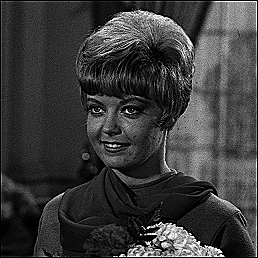

In [15]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

# Emboss


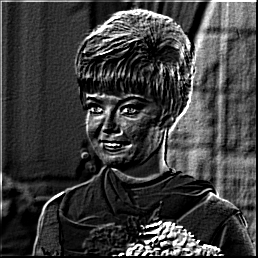

In [16]:
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

# Left Sobel Edge Detection

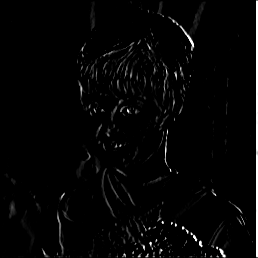

In [19]:
kernel_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-2]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

# Canny Edge Detection

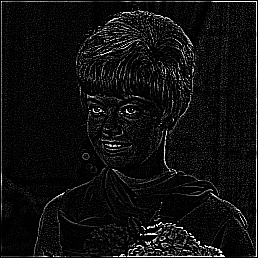

In [18]:
kernel_canny = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

# Prewitt Edge Detection

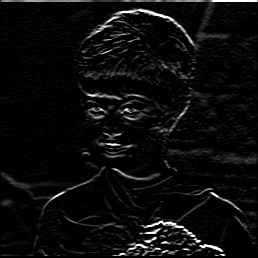

In [20]:
kernel_prewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

# 5x5 Gaussian Blur

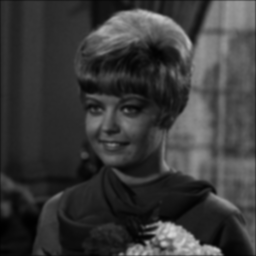

In [21]:
kernel_gauss5 = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256

cv2_imshow(convolution2d(img_gray, kernel_gauss5, 1, 2))

# 21x21 Gaussian Blur

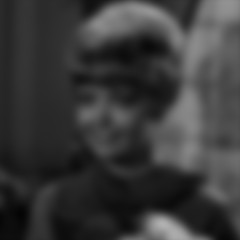

In [22]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
kernel_gaussian = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss21 = kernel_gaussian @ kernel_gaussian.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss21, 1, 2))